In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import logistic

In [2]:
data = pd.read_csv('./heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


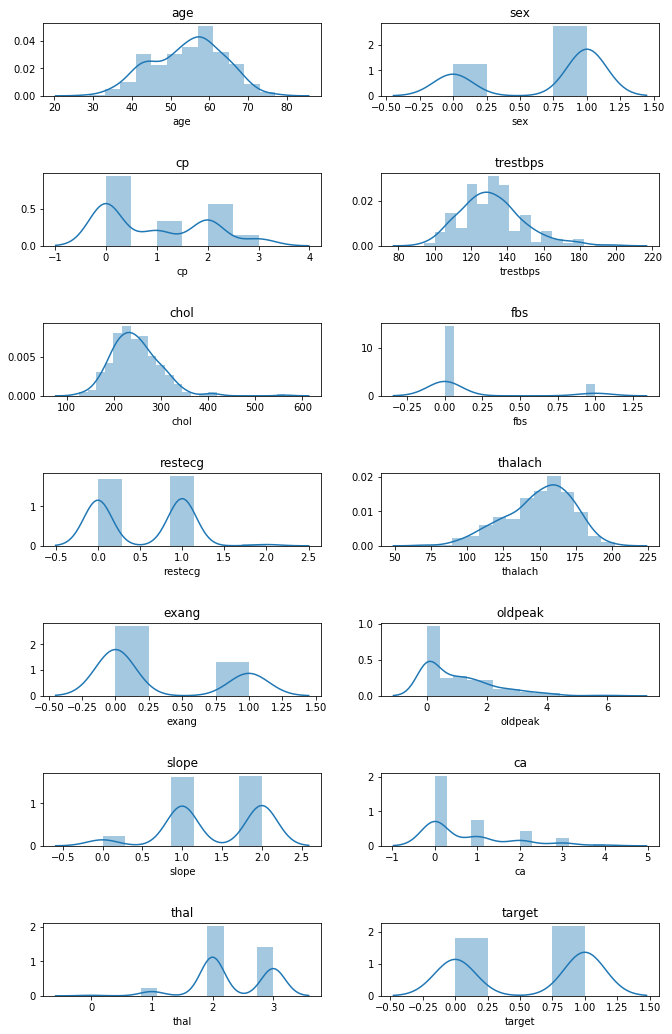

In [5]:
def distribution(data):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,15))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        sns.distplot(data[i])
        plt.title(i)
        cont += 1
    plt.show()
    
def correlations(data, y):
    axis = []
    cont = 1
    fig = plt.figure(figsize=(10,10))
    for i in data:
        axtemp = fig.add_subplot(7,2,cont)
        fig.tight_layout(pad=3.0)
        plt.scatter(data[i], data[y])
        plt.title(i)
        cont += 1
    plt.show()

distribution(data)

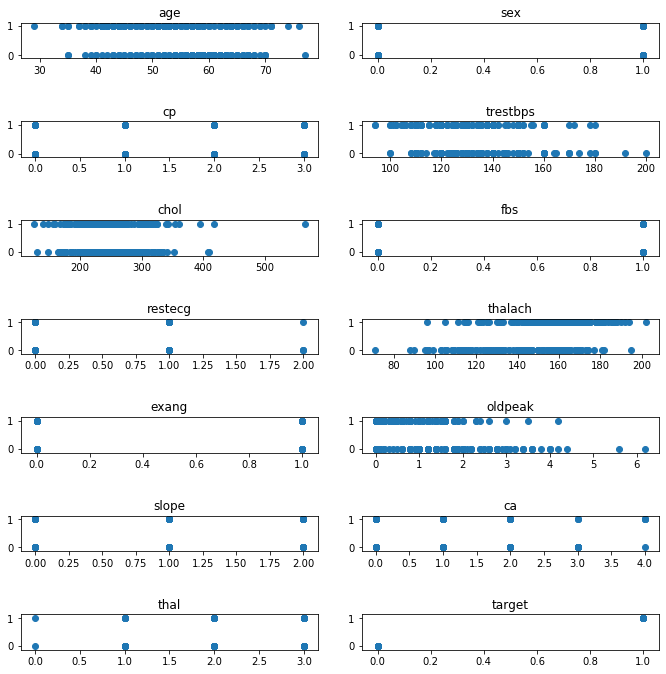

In [6]:
correlations(data, 'target')

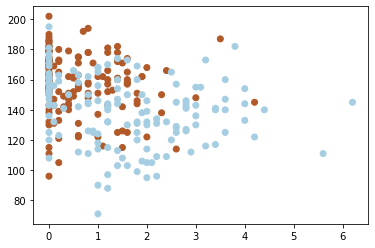

In [7]:
plt.scatter(data['oldpeak'], data['thalach'], c=data['target'], cmap=plt.cm.Paired)

In [10]:
# Probar para cada variable 
x1 = data['age']
y = data['target']

unos = np.asarray([1 for i in range(x1.shape[0])])
xes = np.vstack([unos, x1]).transpose()

y = np.expand_dims(y,1)
thetas = np.expand_dims(np.asarray([0,0], dtype='float64'),1)

In [35]:
res = logistic.gradient_descent(xes, y, thetas, 0.001, 100000)

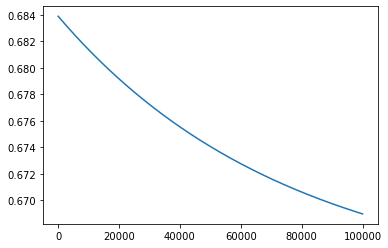

In [36]:
numeracion = [i for i in range(len(res))]
costos = [i[1] for i in res]
plt.plot(numeracion, costos)

In [38]:
ok = res[len(res) - 1][0]
ok

array([[ 1.64391595],
       [-0.02753577]])

In [53]:
xl = np.linspace(0,100,200)
y = 1 / (1 + (np.e ** -(ok[0] + xl * ok[1])))

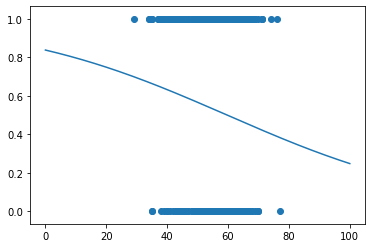

In [54]:
plt.scatter(data['age'], data['target'])
plt.plot(xl, y)